<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание" data-toc-modified-id="Описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание</a></span><ul class="toc-item"><li><span><a href="#Задача" data-toc-modified-id="Задача-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Задача</a></span></li></ul></li><li><span><a href="#Загрузка-данных,-анализ-и-подготовка" data-toc-modified-id="Загрузка-данных,-анализ-и-подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных, анализ и подготовка</a></span><ul class="toc-item"><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка данных</a></span></li><li><span><a href="#Подготовка-данных-для-моделей" data-toc-modified-id="Подготовка-данных-для-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовка данных для моделей</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#SGDClassifier" data-toc-modified-id="SGDClassifier-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>SGDClassifier</a></span></li><li><span><a href="#Итоговая-оценка-качества-предсказания-лучшей-модели" data-toc-modified-id="Итоговая-оценка-качества-предсказания-лучшей-модели-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Итоговая оценка качества предсказания лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Описание

Компания онлайн-сервис с высоким уровнем входящего трафика имеет специализированный отдел безопасности, который занимается фильтрацией и анализом трафика. Сотрудники этого отдела обратились за помощью в автоматизации выявления аномального и злонамеренного трафика. 

### Задача 

Разработать модель, которая будет классифицировать трафик на нормальный и злонамеренный, включая следующие типы атак: DDoS, SQL-инъекции, брутфорс, вредоносные программы и т.д.

Основные этапы полноценного исследования:  
— загрузка и ознакомление с данными,  
— предварительная обработка,  
— полноценный разведочный анализ,  
— разработка новых синтетических признаков,  
— проверка на мультиколлинеарность,  
— отбор финального набора обучающих признаков,  
— выбор и обучение моделей,  
— итоговая оценка качества предсказания лучшей модели,  
— анализ важности ее признаков.

* Загрузить данные
* Провести EDA
* Построить baseline
* Построить максимально качественную модель
* (*) Собрать REST API сервис

Ссылка на датасет: https://disk.yandex.ru/d/QYraoEwmfQZ90Q

## Загрузка данных, анализ и подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import joblib

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier

from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline, Pipeline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

In [2]:
RANDOM_STATE = 12345

In [3]:
pth1 = '/datasets/'
pth2 = 'datasets/'

if os.path.exists(pth1):
    path = pth1
elif os.path.exists(pth2):
    path = pth2
else:
    print('File or directory not found for file: ', file)
data = pd.read_csv(path + 'network_traffic_data.csv')

In [4]:
display(data.shape)
display(data.info())

(539616, 79)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539616 entries, 0 to 539615
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             539616 non-null  int64  
 1    Flow Duration                539616 non-null  int64  
 2    Total Fwd Packets            539616 non-null  int64  
 3    Total Backward Packets       539616 non-null  int64  
 4   Total Length of Fwd Packets   539616 non-null  int64  
 5    Total Length of Bwd Packets  539616 non-null  int64  
 6    Fwd Packet Length Max        539616 non-null  int64  
 7    Fwd Packet Length Min        539616 non-null  int64  
 8    Fwd Packet Length Mean       539616 non-null  float64
 9    Fwd Packet Length Std        539616 non-null  float64
 10  Bwd Packet Length Max         539616 non-null  int64  
 11   Bwd Packet Length Min        539616 non-null  int64  
 12   Bwd Packet Length Mean       539616 non-nul

None

In [5]:
display(data.head())
display(data.describe())

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,5480074,3,1,12,0,6,0,4.000,3.465,0,0,0.0,0.0,2.189751,0.729917,1.826691e+06,3.131700e+06,5442804,101,5480074,2740037.000,3.822290e+06,5442804,37270,0,0.000,0.00,0,0,0,0,0,0,72,32,0.547438,0.182479,0,6,2.4,3.287,10.8000,0,0,0,1,0,0,0,0,0,3.00,4.000,0.0,72,0,0,0,0,0,0,3,12,1,0,8192,42780,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,443,711977,9,10,703,3950,267,0,78.100,103.300,1448,0,395.0,587.5,6535.323473,26.686255,3.955428e+04,5.015462e+04,120501,1,616301,77037.625,7.299598e+04,215614,230,616874,68541.555,71985.97,199836,1,0,0,0,0,296,328,12.640858,14.045398,0,1448,232.6,442.800,196012.6600,0,0,0,1,0,0,0,0,1,244.90,78.100,395.0,296,0,0,0,0,0,0,9,703,10,3950,29200,252,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,53,153398,2,2,80,224,40,40,40.000,0.000,112,112,112.0,0.0,1981.772904,26.075959,5.113267e+04,8.855831e+04,153391,3,3,3.000,0.000000e+00,3,3,4,4.000,0.00,4,4,0,0,0,0,40,40,13.037980,13.037980,40,112,68.8,39.440,1555.2000,0,0,0,0,0,0,0,0,1,86.00,40.000,112.0,40,0,0,0,0,0,0,2,80,2,224,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,53,57660,1,1,46,128,46,46,46.000,0.000,128,128,128.0,0.0,3017.689906,34.686091,5.766000e+04,0.000000e+00,57660,57660,0,0.000,0.000000e+00,0,0,0,0.000,0.00,0,0,0,0,0,0,20,20,17.343046,17.343046,46,128,73.3,47.340,2241.3333,0,0,0,0,0,0,0,0,1,110.00,46.000,128.0,20,0,0,0,0,0,0,1,46,1,128,-1,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,8446,767,3,1,43,6,31,6,14.336,14.440,6,6,6.0,0.0,63885.267280,5215.123859,2.556667e+02,3.942896e+02,710,3,713,356.500,4.999245e+02,710,3,0,0.000,0.00,0,0,0,0,0,0,60,20,3911.342800,1303.781000,6,31,11.0,11.180,125.0000,0,0,0,0,1,0,0,0,0,13.75,14.336,6.0,60,0,0,0,0,0,0,3,43,1,6,1017,0,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,539616.000000,5.396160e+05,539616.000000,539616.000000,5.396160e+05,5.396160e+05,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,5.391280e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,539616.000000,539616.0,539616.000000,539616.0,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,539616.000000,539616.000000,539616.000000,539616.000000,5.396160e+05,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,5.396160e+05,539616.0,539616.0,539616.0,539616.0,539616.0,539616.0,539616.000000,5.396160e+05,539616.000000,5.396160e+05,539616.000000,539616.000000,539616.000000,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05
mean,5563.061394,2.106693e+07,6.119972,5.985495,4.082371e+02,7.999779e+03,169.449966,11.855382,44.681011,59.525095,1675.074384,23.508936,550.037006,697.306414,inf,inf,2.134902e+06,5.264535e+06,1.731840e+07,2.945584e+05,2.075634e+07,4.036797e+06,6.666492e+06,1.720041e+07,1.035760e+06,9.601754e+06,2.028745e+06,2.413091e+06,6.464188e+06,8.147788e+05,0.036747,0.0,0.000056,0.0,-4.593957e+03,-4.290450e+03,7.142149e+04,7.885307e+03,9.609552,1723.695630,276.581177,544.090932,1.112688e+06,0.062524,0.036747,0.000120,0.377765,0.365884,0.060567,0.000056,0.000120,0.643446,305.358765,44.681011,550.037006,-4.593957e+03,0.0,0.0,0.0,0.0,0.0,0.0,6.119972,4.082371e+02,5.985495,7.998768e+03,7564.762311,1277.937053,2.946516,-2.429314e+03,1.154984e+05,4.037570e+04,1.672882e+05,8.983017e+04,1.610155e+07,9.585649e+05,1.687227e+07,1.539150e+07
std,14921.262751,3.812172e+07,345.109317,463.490949,7.478351e+03,1.014442e+06,560.533869,60.961661,150.873880,217.729412,2843.534429,55.198582,869.702147,1255.312166,NaN,NaN,5.824585e+06,1.055110e+07,3.395701e+07,4.269410e+06,3.812106e+07,1.062759e+07,1.391409e+07,3.402154e+07,8.949951e+06,2.807218e+07,9.045625e+06,8.975673e+06,2.192197e+07,7.698887e+06,0.188139,0.0,0.007456,0.0,2.095355e+06,2.076610e+06,2.685287e+05,3.847268e+04,21.551058,2862.902929,416.169617,903.656284,2.468134e+06,0.242105,0.188139,0.010975,0.484829,0.481678,0.238535,0.007456,0.010975,0.634460,457.152955,150.873880,869.702147,2.095355e+06,0.0,0.0,0.0,0.0,0.0,0.0,345.109317,7.478351e+03,463.490949,1.013814e+06,13440.653528,6590.247532,267.510434,1.052329e+06,7.787530e+05,4.347032e+05,1.059626e+06,7.099710e+05,3.315463e+07,6.461275e+06,3.403851e+07,3.295695e+07

* Есть 8 пустых столбцов: Fwd Avg Bytes/Bulk, Fwd Avg Packets/Bulk, Fwd Avg Bulk Rate, Bwd Avg Bytes/Bulk, Bwd Avg Packets/Bulk, Bwd Avg Bulk Rate, Bwd PSH Flags, Bwd URG Flags.

In [6]:
data['Label'].unique()

array(['BENIGN', 'PortScan', 'DoS Hulk', 'DDoS', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS GoldenEye', 'Heartbleed'],
      dtype=object)

In [4]:
print('Количество явных дубликатов:', data.duplicated().sum(), '\n')
print('Количество пропусков: \n', data.isna().sum().sort_values(ascending=False).head(5))
print('Количество бесконечных значений: \n', data[data == np.inf].count().sort_values(ascending=False).head(5))

Количество явных дубликатов: 64601 

Количество пропусков: 
 Flow Bytes/s             488
 Destination Port          0
 Bwd Avg Bytes/Bulk        0
 Fwd Avg Packets/Bulk      0
Fwd Avg Bytes/Bulk         0
dtype: int64
Количество бесконечных значений: 
  Flow Packets/s         734
Flow Bytes/s            246
 Destination Port         0
 Average Packet Size      0
 Fwd Avg Bulk Rate        0
dtype: int64


* Пропуски в Flow Bytes/s заменим на медианные значения.
* Полные дубликаты удалим.
* Заменим бесконечные значения в Flow Packets/s и Flow Bytes/s на значения больше 1.250000e+05 и 2.898551e+04, например на 10е+09.
* Пустые колонки удалим.

### Обработка данных

In [5]:
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
#Приведем названия колонок к стандарту
data.columns = data.columns.str.replace(' ', '') 
data.columns = (data.columns.str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True).str.lower())
data.columns

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_lengthof_fwd_packets',
       'total_lengthof_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iatmean', 'flow_iatstd', 'flow_iatmax', 'flow_iatmin',
       'fwd_iattotal', 'fwd_iatmean', 'fwd_iatstd', 'fwd_iatmax', 'fwd_iatmin',
       'bwd_iattotal', 'bwd_iatmean', 'bwd_iatstd', 'bwd_iatmax', 'bwd_iatmin',
       'fwd_pshflags', 'bwd_pshflags', 'fwd_urgflags', 'bwd_urgflags',
       'fwd_header_length', 'bwd_header_length', 'fwd_packets/s',
       'bwd_packets/s', 'min_packet_length', 'max_packet_length',
       'packet_length_mean', 'packet_length_std', 'packet_length_variance',
       'finflag_count', 'synflag_count', 'rstflag_count', 'pshfl

In [7]:
#Посмотрим на значения двух очень похоже называнных столбцов:

#data[{'fwd_header_length', 'fwd_header_length.1'}]

data['fwd_header_length'].isin(data['fwd_header_length.1']).value_counts()

True    539616
Name: fwd_header_length, dtype: int64

 * Все значения совпадают, удалим столбец вместе с остальными ниже.

In [1]:
#график любого параметра, пусть будет FlowPackets
# fig, ax = plt.subplots(figsize=(7, 5))

# ax.plot(data['flow_packets/s'])
# ax.set_xlabel('index')
# ax.set_ylabel('Packets/s')
# ax.set_title('FlowPackets/s')

# plt.show()

In [9]:
#Заменим бесконечные значения большими конечными
data['flow_packets/s'] = data['flow_packets/s'].replace([np.inf, -np.inf], 10000000000)

In [10]:
data['flow_bytes/s'] = data['flow_bytes/s'].replace([np.inf, -np.inf], 10000000000)

In [11]:
#Удалим пустые колонки
data.drop(columns=['fwd_avg_bytes/bulk', 'fwd_avg_packets/bulk', 'fwd_avg_bulk_rate', 'bwd_avg_bytes/bulk', 'bwd_avg_packets/bulk', 'bwd_avg_bulk_rate', 'bwd_pshflags', 'bwd_urgflags', 'fwd_header_length.1'], inplace=True)
#data.head()

In [12]:
# Пустые значения в FlowBytes заменим медианой
data['flow_bytes/s'] = data['flow_bytes/s'].replace(np.nan, data['flow_bytes/s'].median())

In [13]:
#удалим дубликаты
data2 = data.drop_duplicates()

* Пропуски в Flow Bytes/s заменены на медианные значения, бесконечные значения в Flow Packets/s и Flow Bytes/s заменены на значения больше 1.250000e+05 и 2.898551e+04, например на 10е+10.
* Полные дубликаты и пустые колонки удалены.

### Подготовка данных для моделей

In [14]:
#Для категориальных моделей закодируем признаки OrdinalEncoder
encoder = OrdinalEncoder()

cat_features = ['label']

encoder.fit(data2[cat_features])

data_ord = data2.copy()

data_ord[cat_features] = encoder.transform(data_ord[cat_features])
print(data_ord.shape)
data_ord['label'].unique()

(475015, 70)


array([ 0., 10.,  4.,  2.,  1.,  9., 12., 14., 13.,  7., 11.,  6.,  5.,
        3.,  8.])

In [15]:
X = data_ord.drop('label', axis=1)
y = data_ord['label']

In [16]:
#Разобьем на учебную и тестовую выборки:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(356261, 69) (118754, 69) (356261,) (118754,)


## Обучение моделей

### Логистическая регрессия

In [28]:
%%time

X, y = make_classification(random_state=RANDOM_STATE)

pipe = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced', 
                                                          #solver='sag',
                                                          n_jobs=-1,
                                                          random_state=RANDOM_STATE, max_iter=3000))
pipe.fit(X_train, y_train) 

CPU times: total: 2.42 s
Wall time: 35min 10s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=3000,
                                    n_jobs=-1, random_state=12345))])

In [29]:
pipe.score(X_train, y_train)
#print(cross_val_score(pipe, X_train, y_train, cv=5).mean())

0.8950656962170993

### DecisionTreeClassifier

In [168]:
%%time

clf_dt = DecisionTreeClassifier(class_weight='balanced', criterion='gini', random_state=RANDOM_STATE)
clf_dt.fit(X_train, y_train)

scores_dt = cross_val_score(clf_dt, X_train, y_train, cv=5)
scores_dt.mean()

CPU times: total: 3min 4s
Wall time: 3min 6s


0.9963706383565378

### RandomForestClassifier

In [31]:
%%time

clf_rf = RandomForestClassifier(n_estimators=10,
                                min_samples_leaf=2, 
                                random_state=RANDOM_STATE)
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=5)
scores.mean()

CPU times: total: 2min 11s
Wall time: 2min 12s


0.9966709804485199

### CatBoostClassifier 

In [165]:
%time

model_cb = CatBoostClassifier(class_weights=None, loss_function="MultiClass", iterations=100, thread_count=-1, 
                              learning_rate=0.05, eval_metric='Accuracy', 
                              verbose=2, random_state=RANDOM_STATE)
model_cb.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
0:	learn: 0.9285973	total: 3.25s	remaining: 5m 21s
2:	learn: 0.9548758	total: 9.41s	remaining: 5m 4s
4:	learn: 0.9585501	total: 15.5s	remaining: 4m 54s
6:	learn: 0.9550470	total: 21.7s	remaining: 4m 48s
8:	learn: 0.9590525	total: 28s	remaining: 4m 43s
10:	learn: 0.9596083	total: 34.2s	remaining: 4m 36s
12:	learn: 0.9642678	total: 40.4s	remaining: 4m 30s
14:	learn: 0.9654804	total: 46.6s	remaining: 4m 24s
16:	learn: 0.9665554	total: 52.8s	remaining: 4m 17s
18:	learn: 0.9722759	total: 59.1s	remaining: 4m 12s
20:	learn: 0.9730928	total: 1m 5s	remaining: 4m 5s
22:	learn: 0.9732471	total: 1m 11s	remaining: 3m 59s
24:	learn: 0.9738057	total: 1m 17s	remaining: 3m 53s
26:	learn: 0.9741987	total: 1m 23s	remaining: 3m 46s
28:	learn: 0.9746618	total: 1m 29s	remaining: 3m 39s
30:	learn: 0.9750548	total: 1m 36s	remaining: 3m 34s
32:	learn: 0.9759278	total: 1m 42s	remaining: 3m 27s
34:	learn: 0.9759895	total: 1m 48s	remaining: 3m 22s
36:	learn: 0.9760260	total:

In [167]:
model_cb.best_score_

{'learn': {'Accuracy': 0.9918879697749684, 'MultiClass': 0.05019055082494067}}

* Модель даёт высокую точность, но уступает по времени выполнения DecisionTreeClassifier.

### SGDClassifier

In [100]:
%%time

clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=0.001))

clf.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

print(cross_val_score(clf, X_train, y_train, cv=5).mean())

0.9474177636810701
CPU times: total: 3min 35s
Wall time: 3min 31s


### Итоговая оценка качества предсказания лучшей модели

Лучшей моделью по результатам обучения оказалась RandomForestClassifier. Её проверим на тестовой выборке.

In [104]:
y_pred_rf = clf_rf.predict(X_test)

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     58416
         1.0       0.94      0.97      0.95       487
         2.0       1.00      1.00      1.00     16109
         3.0       0.99      1.00      1.00      2469
         4.0       1.00      1.00      1.00     21770
         5.0       0.99      0.99      0.99      1272
         6.0       0.99      0.99      0.99      1284
         7.0       1.00      1.00      1.00      1504
         8.0       1.00      1.00      1.00         4
         9.0       1.00      0.83      0.91         6
        10.0       1.00      1.00      1.00     14124
        11.0       1.00      1.00      1.00       768
        12.0       0.77      0.72      0.75       379
        13.0       0.60      0.27      0.37        11
        14.0       0.43      0.49      0.46       151

    accuracy                           1.00    118754
   macro avg       0.91      0.88      0.89    118754
weighted avg       1.00   

* Получена высокая метрика accuracy = 1, метрики по классификации 14 признаков (типов атак) также достаточно высоки.

In [32]:
joblib.dump(clf_rf, "./random_forest.joblib")

['./random_forest.joblib']

In [ ]:
model.predict_proba(pd.DataFrame(X, index=[0]))[0, 1]

#### Анализ важности признаков

<Axes: >

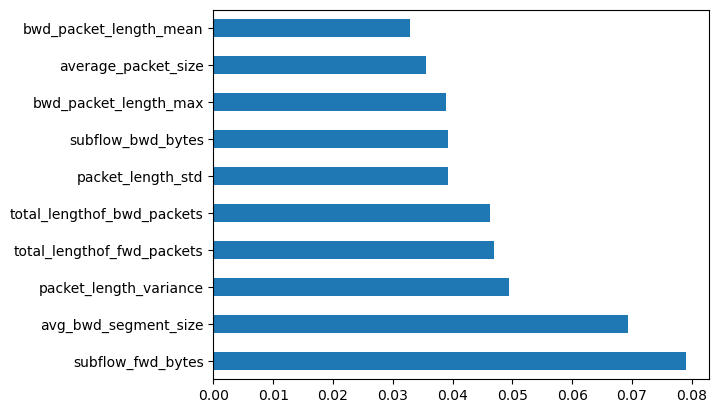

In [52]:
feat_importances = pd.Series(clf_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

    Важнейшими признаками оказались: subflow_fwd_bytes, avg_bwd_segment_size, packet_length_variance, total_lengthof_fwd_packets, total_lengthof_bwd_packets.

## Выводы

*     Данные были обработаны и подготовлены к анализу - удалены пустые и дублирующие столбцы, дублирующие строки, пропуски заменены на медианы, бесконечные значения заменены на большие числовые.
*     Обучены 5 моделей: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, CatBoostClassifier, SGDClassifier.
*     У RandomForestClassifier получилась максимальная Accuracy = 0.9966.
*     Важнейшими признаками оказались: subflow_fwd_bytes, avg_bwd_segment_size, packet_length_variance, total_lengthof_fwd_packets, total_lengthof_bwd_packets.